In [1]:
# --------------------- EDA Rooftop Solar Potential of St.Lucia ----------------------

In [2]:
# --------------------- import necessary library ----------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# --------------------- Load datasets ----------------------
df = pd.read_csv("../original_datasets/manila_rooftop_solar_potential.csv")

print("Initial Shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial Shape: (301381, 12)
Columns: ['uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Unit_installation_price', 'Comment']


In [4]:
df.isna().sum()

uuid                               0
City                               0
Surface_area                       0
Potential_installable_area         0
Peak_installable_capacity          0
Energy_potential_per_year          0
Assumed_building_type              0
Estimated_tilt                     0
Estimated_building_height       1425
Estimated_capacity_factor       5397
Unit_installation_price       301381
Comment                       301381
dtype: int64

In [5]:
#--------------------- Drop Unecessary columns --------------------------
df.drop(['uuid', 'Comment','Unit_installation_price'] , axis=1, inplace=True)

In [6]:
# --------------------- columns after drop  ----------------------
print("Columns:", df.columns.tolist())
print(df.shape)

Columns: ['City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']
(301381, 9)


In [7]:
# ------------------ Missing value ----------------------
df.isna().sum()


City                             0
Surface_area                     0
Potential_installable_area       0
Peak_installable_capacity        0
Energy_potential_per_year        0
Assumed_building_type            0
Estimated_tilt                   0
Estimated_building_height     1425
Estimated_capacity_factor     5397
dtype: int64

In [8]:
# ------------------ Data Type ----------------------
df.dtypes

City                           object
Surface_area                  float64
Potential_installable_area    float64
Peak_installable_capacity     float64
Energy_potential_per_year     float64
Assumed_building_type          object
Estimated_tilt                float64
Estimated_building_height     float64
Estimated_capacity_factor     float64
dtype: object

In [9]:
#---------------- Check Numerical colummns --------------------------
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Columns:", numeric_cols.tolist())

Numeric Columns: ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']


In [10]:
#------------------------- DEcsriptive Satistic of each numerical columns --------------------------
df[numeric_cols].describe()

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
count,301381.000000,301381.000000,301381.000000,3.013810e+05,301381.000000,299956.000000,295984.000000
mean,137.381495,88.691882,17.206348,2.127554e+04,15.971070,8.874939,1229.555285
std,297.088842,233.978386,45.399934,5.749026e+04,5.903196,14.170697,58.802939
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-349.780000,959.000000
25%,40.130000,19.250000,3.730000,4.585390e+03,12.280000,5.110000,1192.460000
50%,78.980000,43.130000,8.370000,1.025662e+04,16.800000,7.200000,1232.460000
75%,150.160000,89.460000,17.360000,2.124491e+04,20.170000,9.960000,1279.000000
max,40507.350000,33201.460000,6453.970000,8.153350e+06,37.360000,903.380000,1338.000000


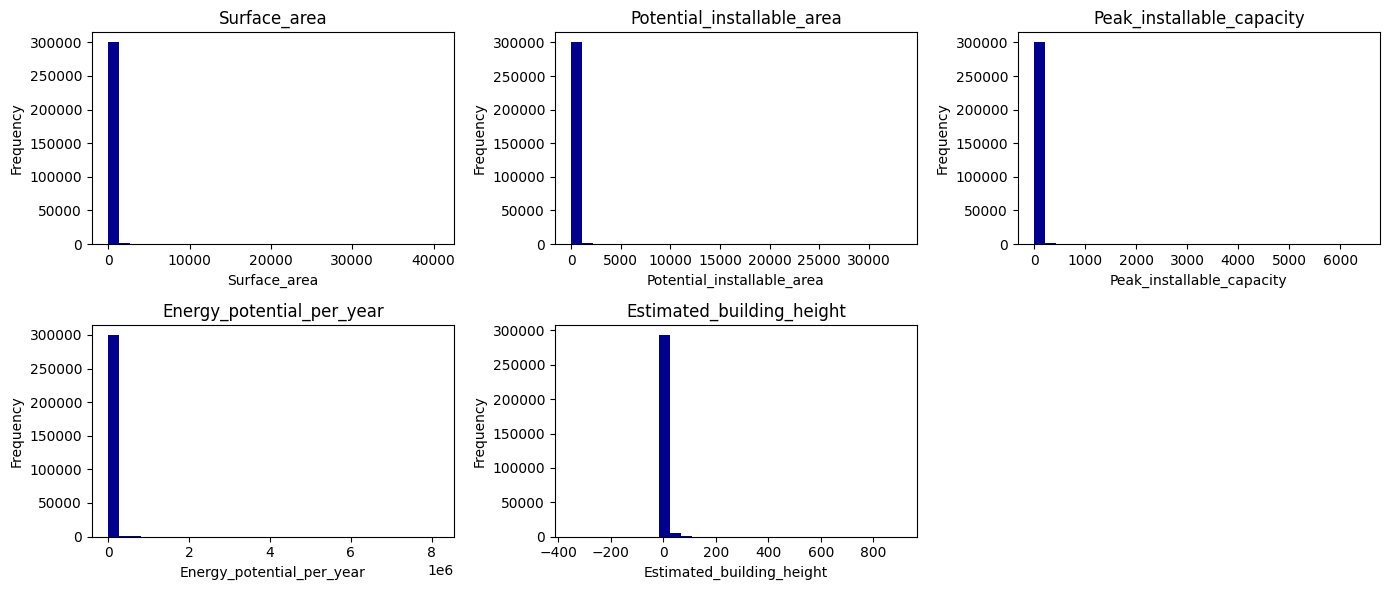

In [11]:
#-------------------- Distribution of necessary columns -------------------------------
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='hist', bins=30, color='darkblue', title=col)
    axes[i].set_xlabel(col)
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

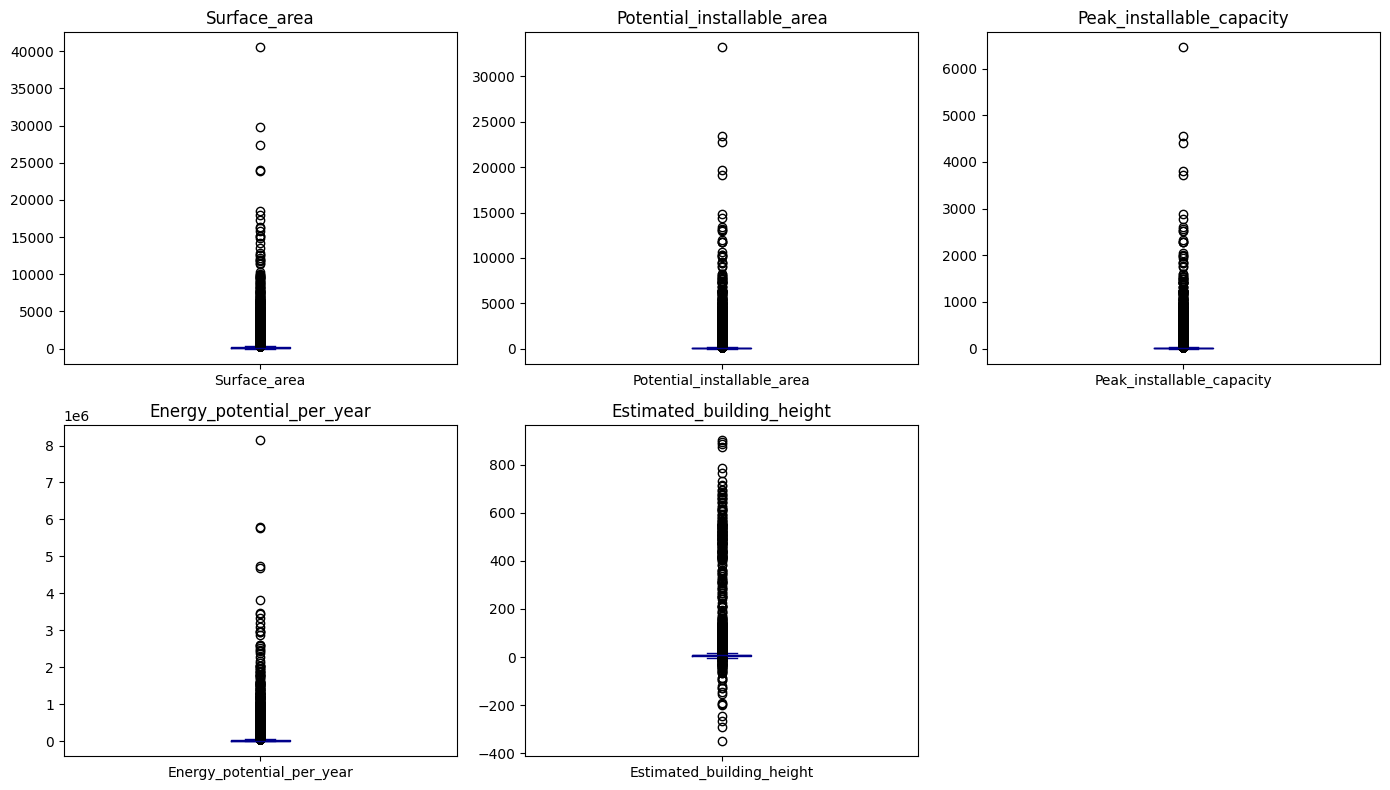

In [12]:
#-------------------- Boxplot of necessary columns to see outliers -------------------------------
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='box', color='darkblue', title=col)
 
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [13]:
(df == 0).sum()
#This means that eventhough there is surface_area but the potential installable area is 0. Then the surface couldn't be installed.

City                             0
Surface_area                     5
Potential_installable_area    5397
Peak_installable_capacity     5397
Energy_potential_per_year     5397
Assumed_building_type            0
Estimated_tilt                4730
Estimated_building_height      650
Estimated_capacity_factor        0
dtype: int64

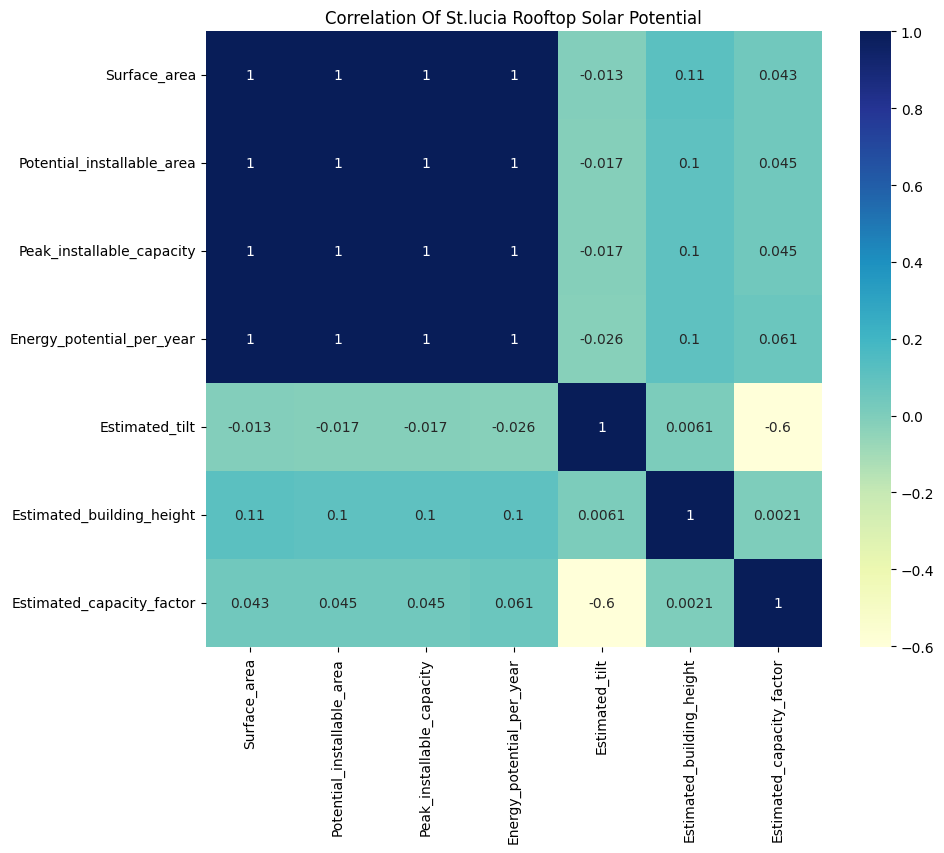

In [14]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()

In [15]:
#Let's see why the value of Peak_installable_capacity and Energy_potential_per_year has correlation 1
df[df['Peak_installable_capacity'] == df['Energy_potential_per_year']]

,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
323,Manila,7.14,0.0,0.0,0.0,single family residential,0.00,7.77,NaN
330,Manila,3.24,0.0,0.0,0.0,single family residential,0.00,3.11,NaN
333,Manila,8.31,0.0,0.0,0.0,single family residential,8.81,0.83,NaN
337,Manila,7.14,0.0,0.0,0.0,single family residential,9.84,0.58,NaN
340,Manila,5.32,0.0,0.0,0.0,single family residential,0.00,3.86,NaN
...,...,...,...,...,...,...,...,...,...
301230,Manila,10.03,0.0,0.0,0.0,multi-family residential,6.73,17.44,NaN
301251,Manila,8.15,0.0,0.0,0.0,multi-family residential,23.64,12.02,NaN
301255,Manila,11.49,0.0,0.0,0.0,multi-family residential,2.18,7.02,NaN
301314,Manila,3.12,0.0,0.0,0.0,multi-family residential,0.00,6.86,NaN


In [16]:
df = df.loc[(df != 0).all(axis=1)]

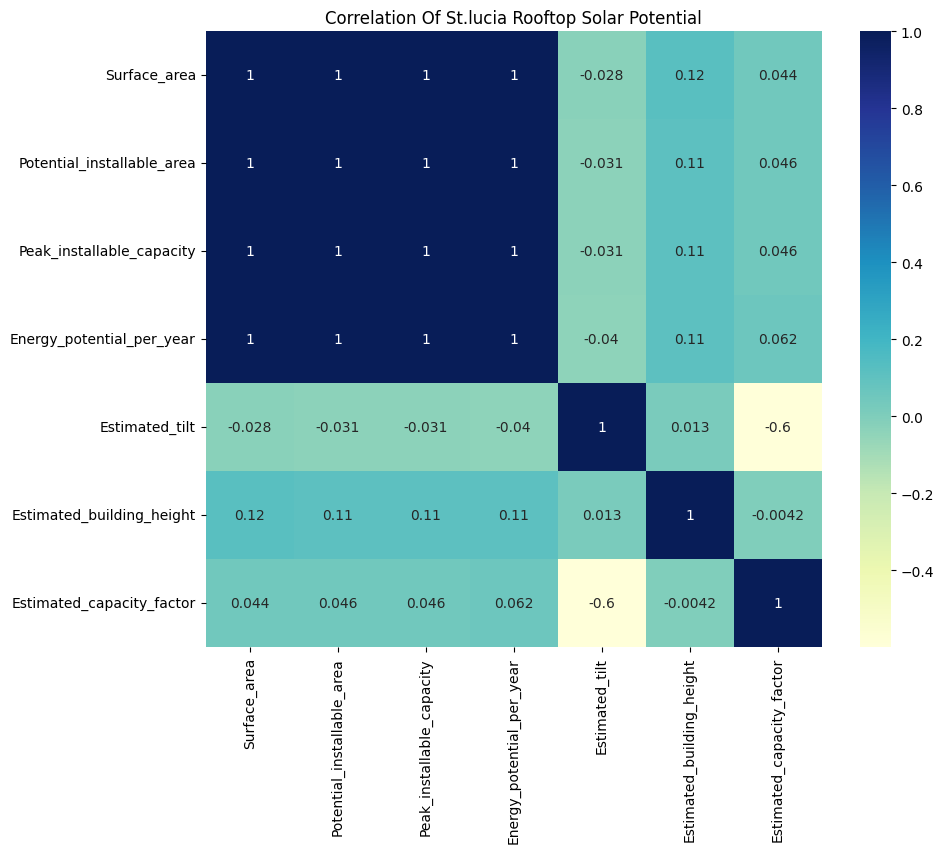

In [17]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()